In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_for_lr.csv')

In [3]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


## Preprocessing

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

x    0
y    0
dtype: int64

## Splitting into test and train data

In [13]:
x_train = np.array(df['x'][:500]).reshape(500,1)
y_train = np.array(df['y'][:500]).reshape(500,1)

x_test = np.array(df['x'][500:]).reshape(199,1)
y_test = np.array(df['y'][500:]).reshape(199,1)

# Linear Regression

- ## Forward Propagation

In [15]:
def forward_propagation(x_train, parameters):
    predictions = np.multiply(m, x_train) + c
    return predictions

- ## Cost Function

In [17]:
def cost_function(y_train, predictions):
    cost = np.mean((predictions - y_train)**2) * 0.5
    return cost

- ## Backward Propagation (Gradient Descent)

In [31]:
def backward_propagation(x_train, y_train, predictions,parameters):
    derivatives = {}

    df = predictions - y_train
    dm = np.mean(np.multiply(df,x_train))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives

- ## Updating Parameters

In [36]:
def update_parameters(derivatives, learning_rate, parameters):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

    return parameters

- ## Model Training

In [43]:
def train(x_train, y_train, learning_rate, iters):
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    loss = []
    
    for i in range(iters):
        predictions = forward_propagation(x_train, parameters)
    
        cost = cost_function(x_train, predictions)
        loss.append(cost)

        print(f"iteration: {i}, loss: {cost}")
        
        fig, ax = plt.subplots()
        plt.plot(x_train, y_train, '+', label = 'Orignal')
        plt.plot(x_train, predictions, '*', label = 'Predictions')

        plt.show()
        derivatives = backward_propagation(x_train, y_train, predictions, parameters)
    
        parameters = update_parameters(derivatives, learning_rate, parameters)

    return parameters, loss

iteration: 0, loss: 1054.5865153003037


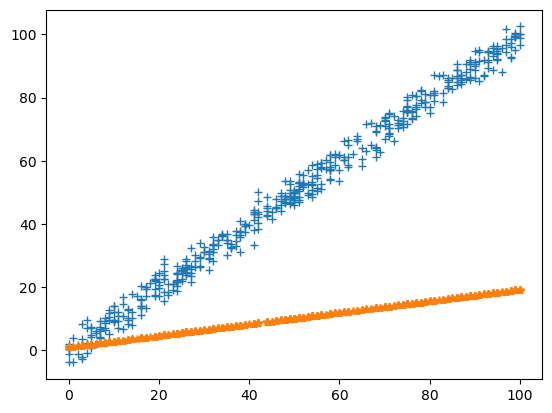

iteration: 1, loss: 480.01233223889386


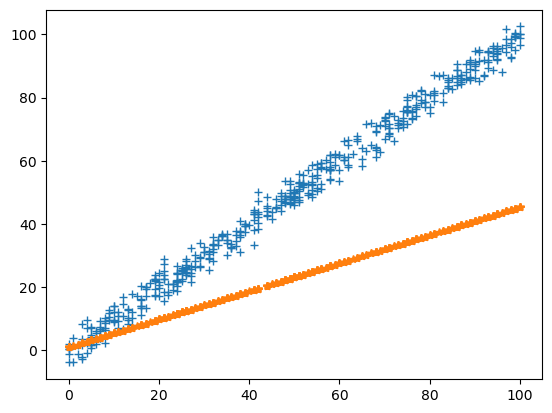

iteration: 2, loss: 218.84416627376987


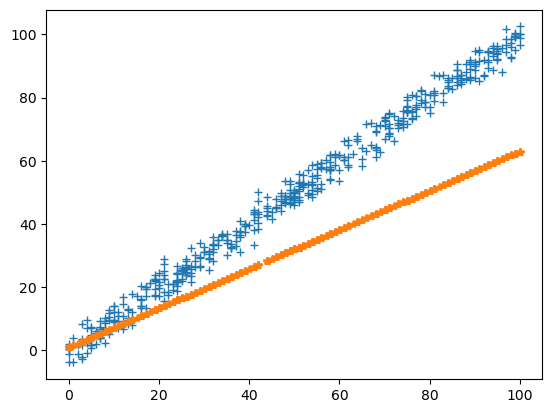

iteration: 3, loss: 100.0263929344356


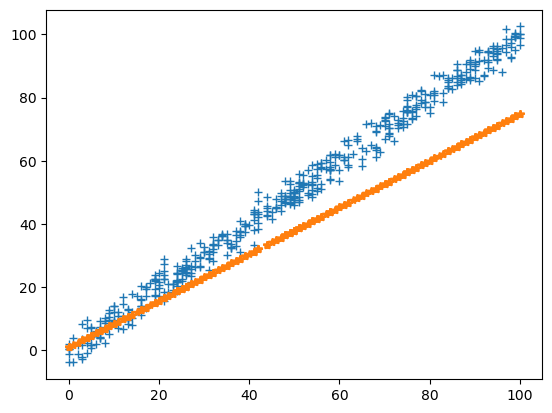

iteration: 4, loss: 45.8993968563486


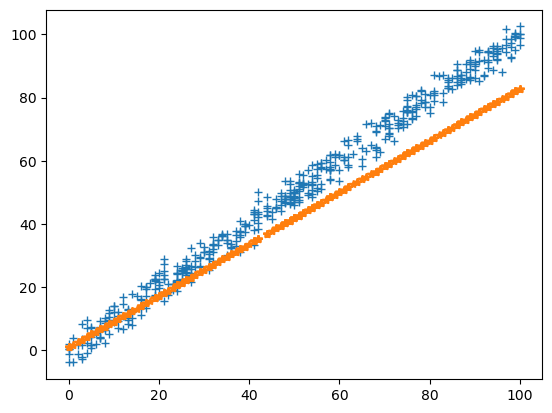

iteration: 5, loss: 21.194242859646106


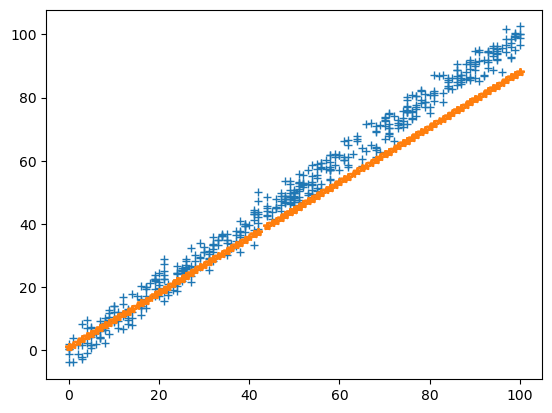

iteration: 6, loss: 9.886015337984354


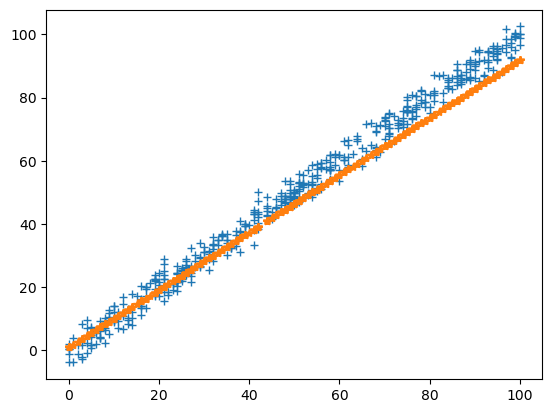

iteration: 7, loss: 4.688457218823775


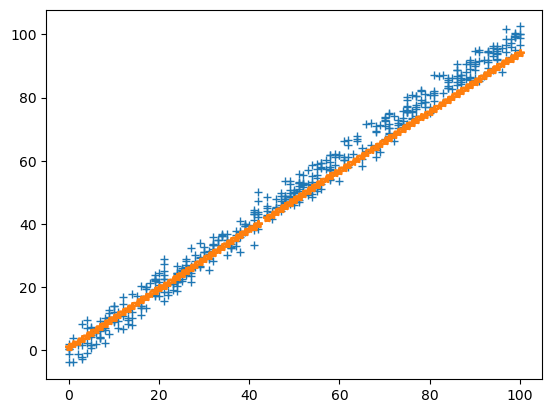

iteration: 8, loss: 2.285186845053465


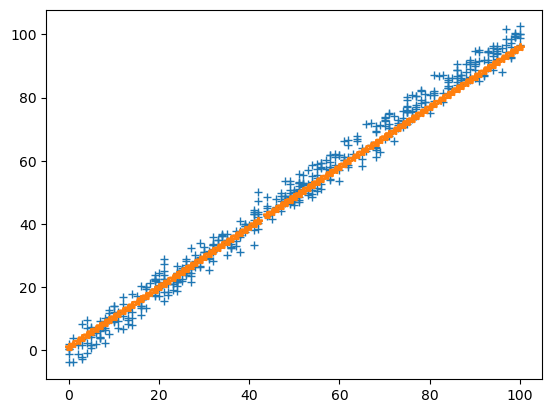

iteration: 9, loss: 1.164419147699601


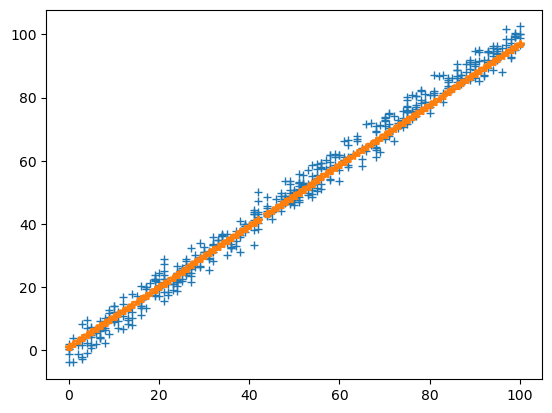

iteration: 10, loss: 0.6354469005950857


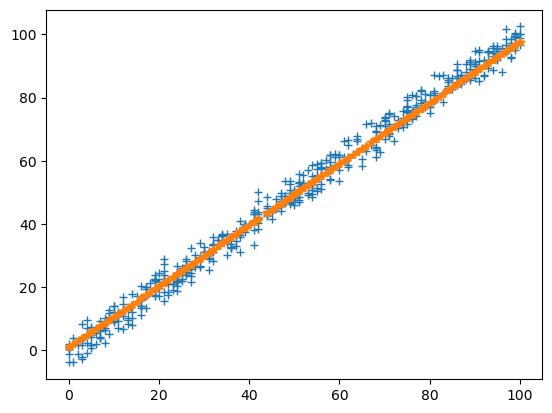

iteration: 11, loss: 0.3816564808230845


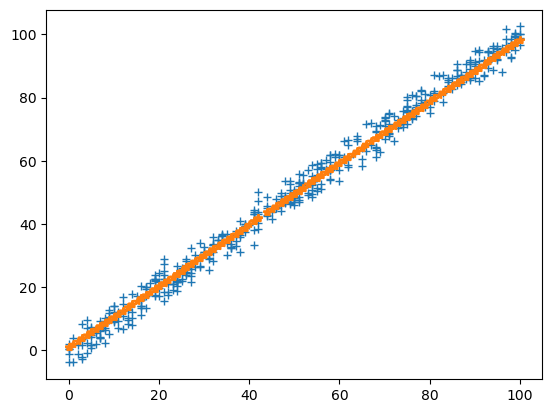

iteration: 12, loss: 0.2572182399457871


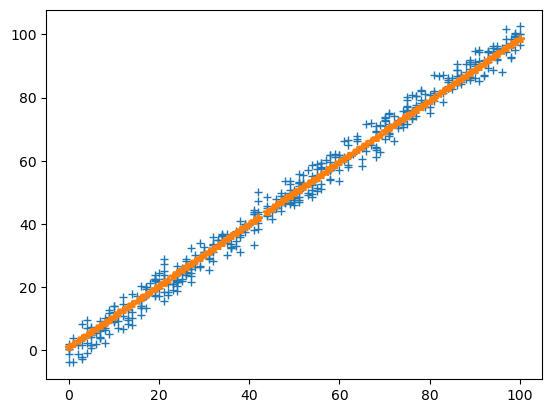

iteration: 13, loss: 0.19449957188472147


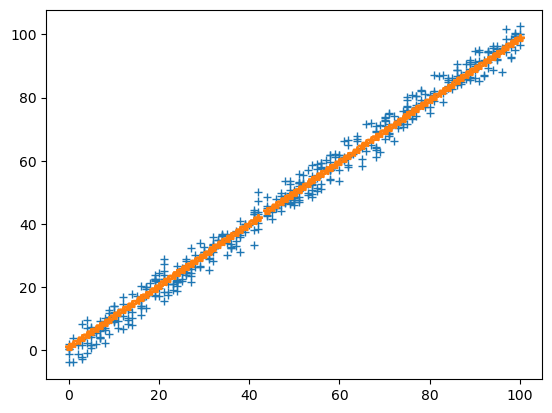

iteration: 14, loss: 0.1618256499921191


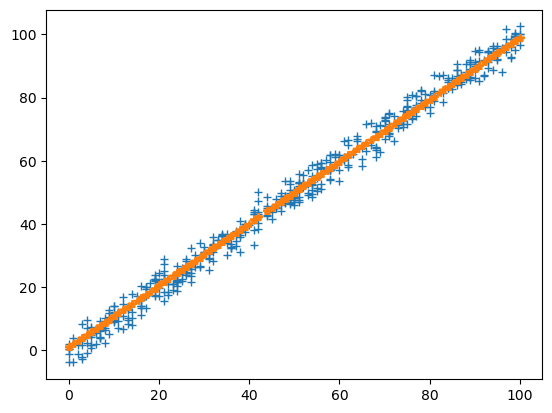

iteration: 15, loss: 0.14415884155863323


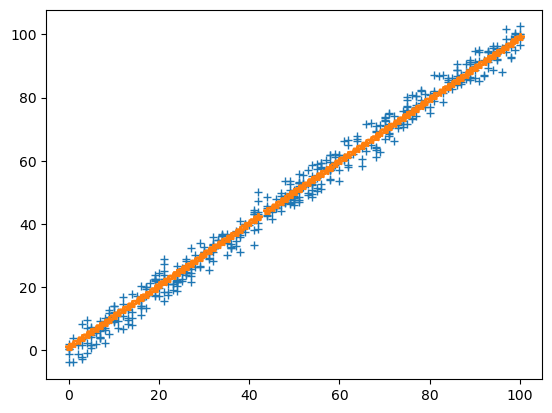

iteration: 16, loss: 0.13422746520862822


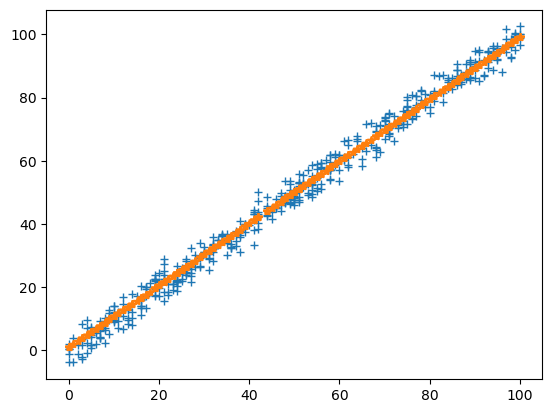

iteration: 17, loss: 0.12842985546388527


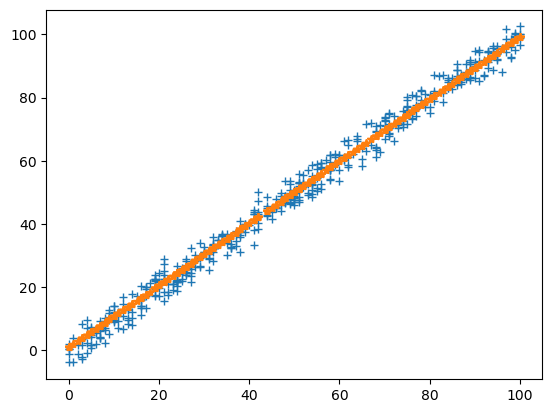

iteration: 18, loss: 0.12492817973273689


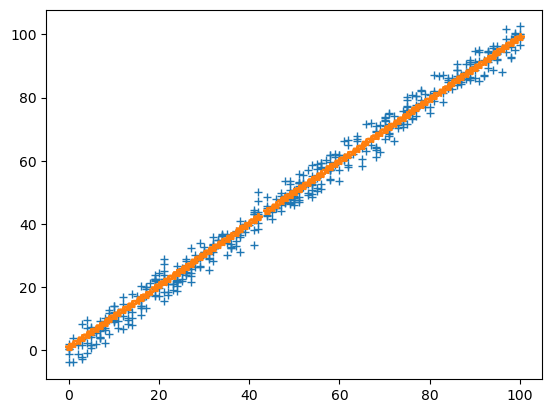

iteration: 19, loss: 0.12275136875131111


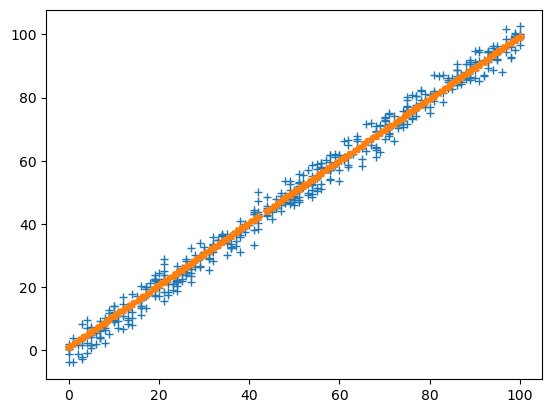

In [44]:
parameters, loss = train(x_train, y_train, 0.0001, 20)

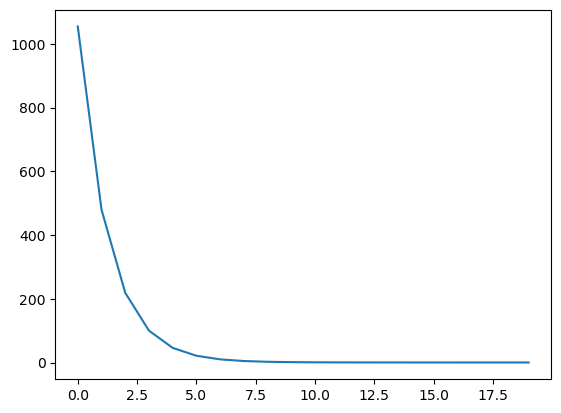

In [45]:
plt.plot(loss)

## Prediction

In [46]:
test_prediction = x_test * parameters['m'] + parameters['c']

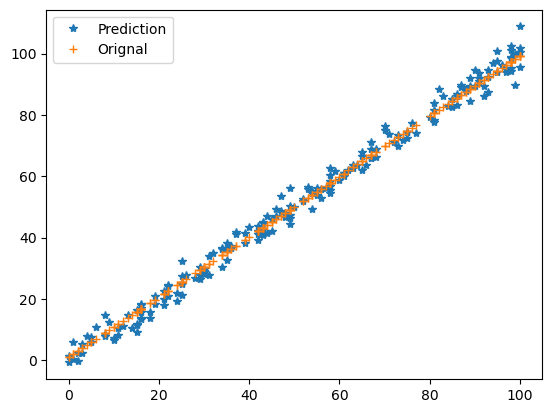

In [49]:
plt.plot(x_test, y_test, '*', label = 'Prediction')
plt.plot(x_test, test_prediction, '+', label = 'Orignal')
plt.legend()
plt.show()

## Cost of predictions

In [51]:
cost = cost_function(y_test, test_prediction)

In [52]:
cost

4.060435312646952

# Linear Regression using Library

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr_model = LinearRegression()

In [55]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [56]:
lr_model.coef_

array([[1.0009993]])

In [57]:
lr_model.intercept_

array([-0.23603461])

In [60]:
lr_predictions = lr_model.predict(x_test)

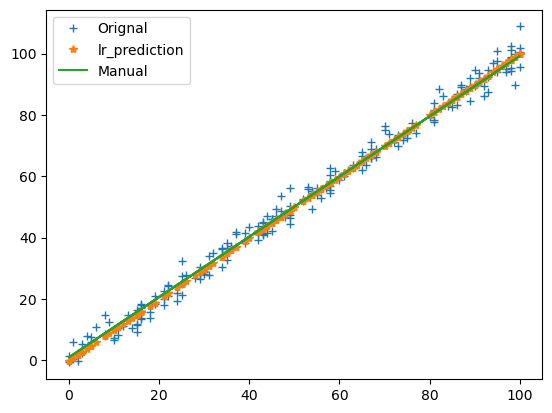

In [62]:
plt.plot(x_test, y_test, '+', label = 'Orignal')
plt.plot(x_test, lr_predictions, '*', label = 'lr_prediction')
plt.plot(x_test, test_prediction, '-', label = 'Manual')
plt.legend()
plt.show()